- Check Cd
- Check Cm
- Try just ascending or descending track
- Check bounds
- Check greens functions
- Check inversion params
- Check sign errors
- Check on the orbital parameters recovered
- What is going on with dip slip

- Add optical, GNSS

## Setup

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pickle
from prep_files_for_altar import main

## Prep files

In [2]:
# multi, faults, datasets, trans, covars = main()
# with open("../results/in01/inputs/tmp_data_gnss.pickle", "wb") as f:
#     pickle.dump((multi, faults, datasets, trans), f)
multi, faults, datasets, trans = pickle.load(open("../results/in01/inputs/tmp_data.pickle", "rb"))

## Perform inversion

In [3]:
# multi.describeParams()

# bounds = []
# bounds += [[-10., 0.]] * faults[0].N_slip
# bounds += [[-.2, .2]] * faults[0].N_slip
# bounds += [[0., 10.]] * faults[1].N_slip
# bounds += [[-.2, .2]] * faults[1].N_slip
# bounds += [[-1., 1.]]*trans.TransformationParameters
# mprior = np.zeros((len(bounds),))

# multi.ConstrainedLeastSquareSoln(bounds=bounds, 
#                               iterations=400,
#                               method='L-BFGS-B',
#                               mprior=mprior, 
#                               tolerance=1e-7, 
#                               maxfun=1e10, 
#                               checkIter=True)
# multi.distributem()
# trans.removePredictions(datasets)
# for data in datasets:
#    data.buildsynth(multi.faults)

# with open("../results/in01/outputs/tmp_results_gnss.pickle", "wb") as f:
#     pickle.dump((multi, faults, datasets, trans), f)
multi, faults, datasets, trans = pickle.load(open("../results/in01/outputs/tmp_results.pickle", "rb"))

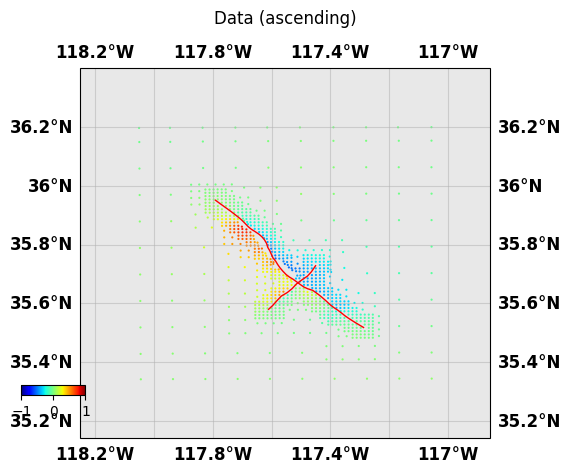

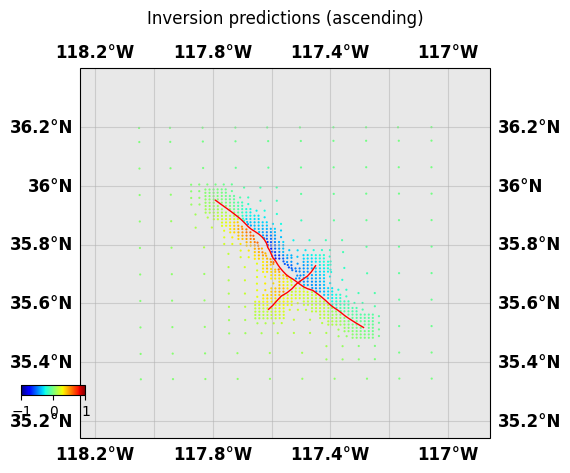

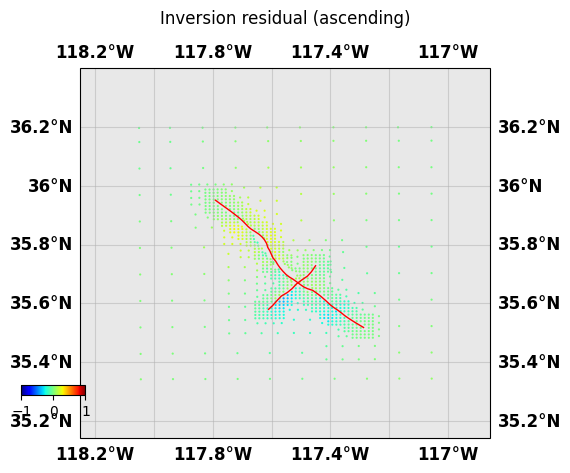

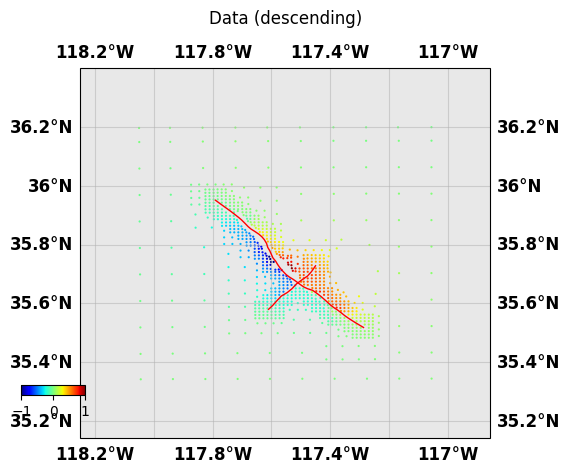

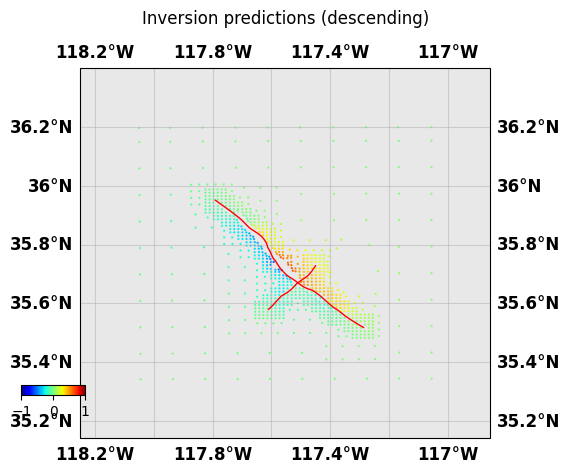

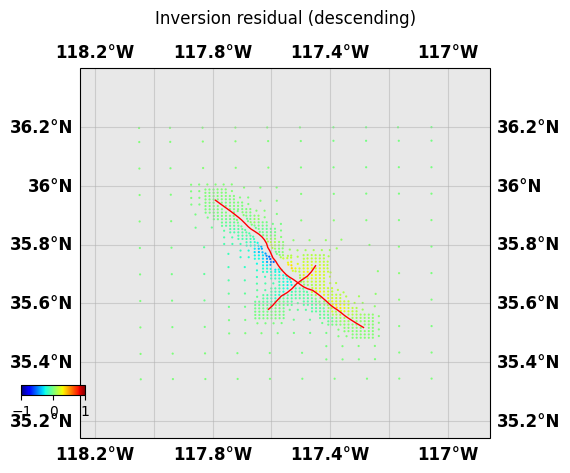

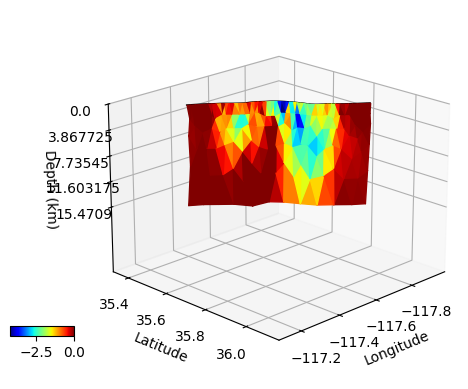

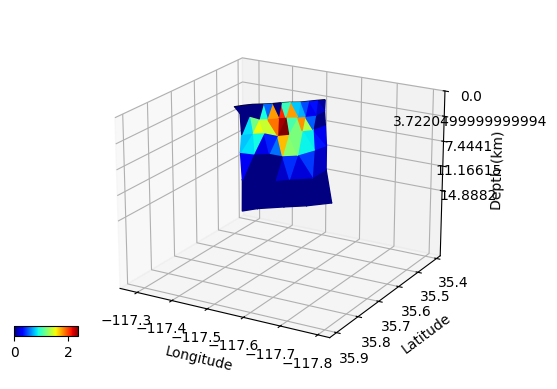

In [4]:
datasets[0].plot(markersize=2.5, data="data", title="Data (ascending)", norm=(-1., 1.), faults=faults)
datasets[0].plot(markersize=2.5, data="synth", title="Inversion predictions (ascending)", norm=(-1., 1.), faults=faults)
datasets[0].plot(markersize=2.5, data="res", title="Inversion residual (ascending)", norm=(-1., 1.), faults=faults)
datasets[1].plot(markersize=2.5, data="data", title="Data (descending)", norm=(-1., 1.), faults=faults)
datasets[1].plot(markersize=2.5, data="synth", title="Inversion predictions (descending)", norm=(-1., 1.), faults=faults)
datasets[1].plot(markersize=2.5, data="res", title="Inversion residual (descending)", norm=(-1, 1.), faults=faults)
faults[0].plot(view=(20., 45.), slip="strikeslip", plot_on_2d=False)
faults[1].plot(view=(20., 120.), slip="strikeslip", plot_on_2d=False)

## Ascending or descending only

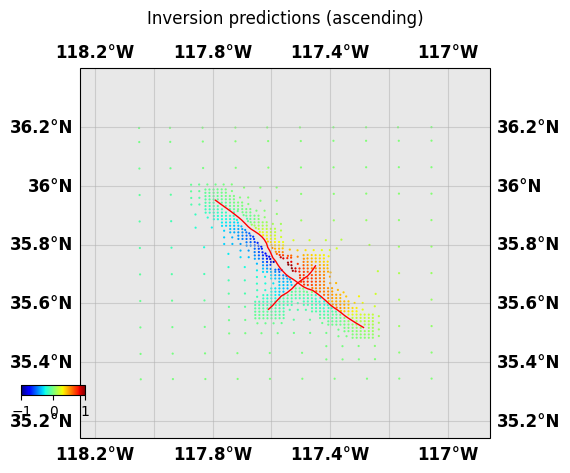

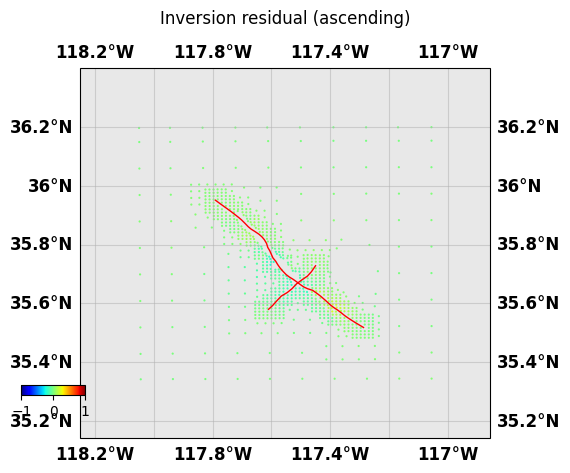

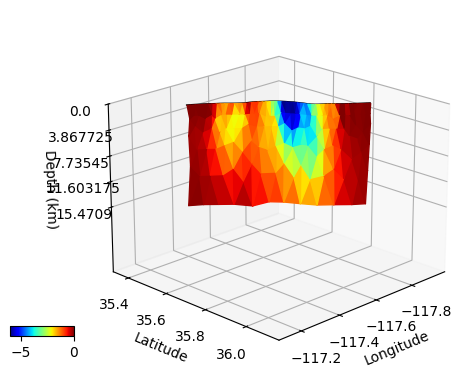

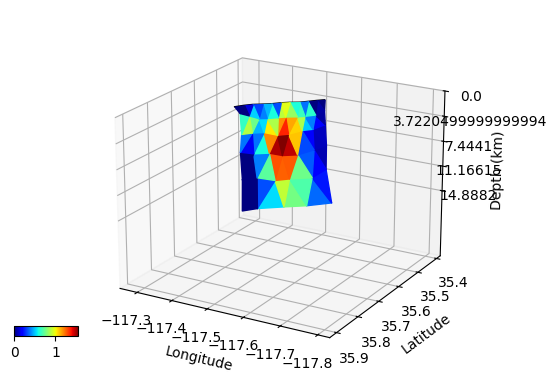

In [19]:
a_or_de = "a"
multi, faults, datasets, trans = pickle.load(open(f"../results/in01/outputs/tmp_results_{a_or_de}scending.pickle", "rb"))

datasets[0].plot(markersize=2.5, data="synth", title=f"Inversion predictions ({a_or_de}scending)", norm=(-1., 1.), faults=faults)
datasets[0].plot(markersize=2.5, data="res", title=f"Inversion residual ({a_or_de}scending)", norm=(-1, 1.), faults=faults)

faults[0].plot(view=(20., 45.), slip="strikeslip", plot_on_2d=False, norm=(-6., 0))
faults[1].plot(view=(20., 120.), slip="strikeslip", plot_on_2d=False)

## Check bounds

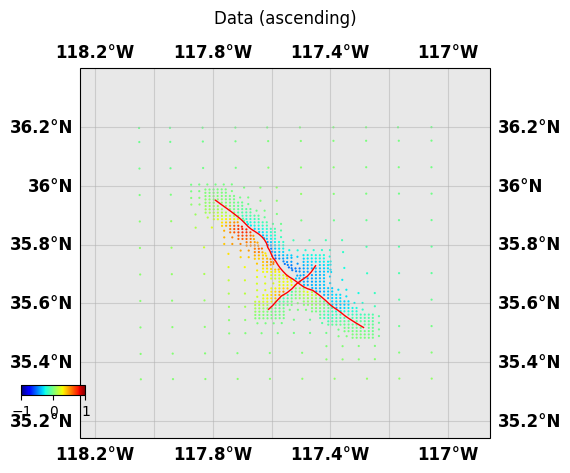

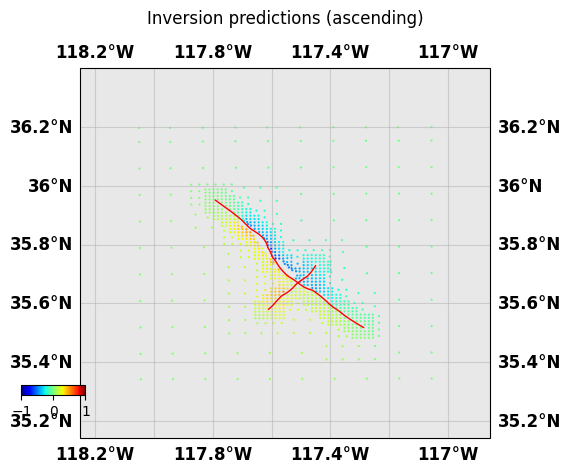

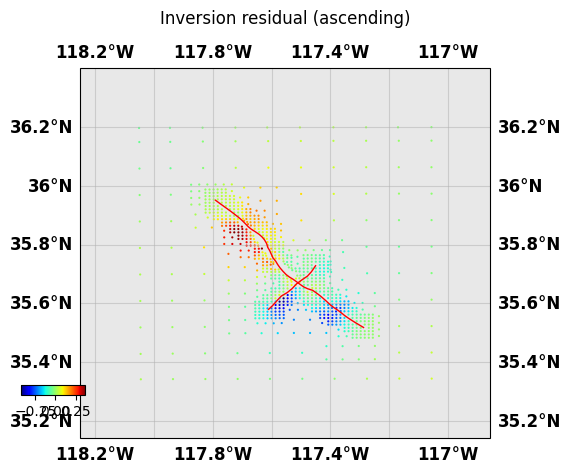

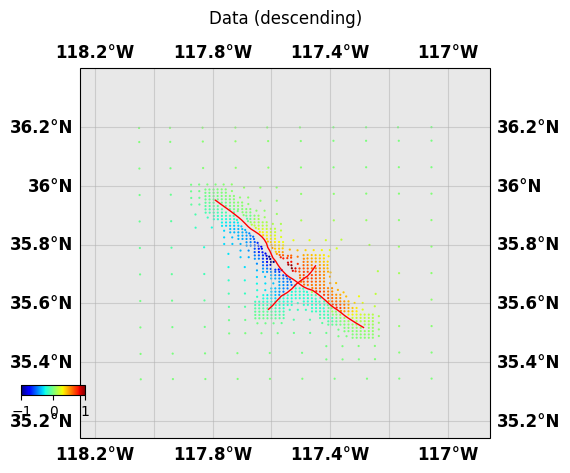

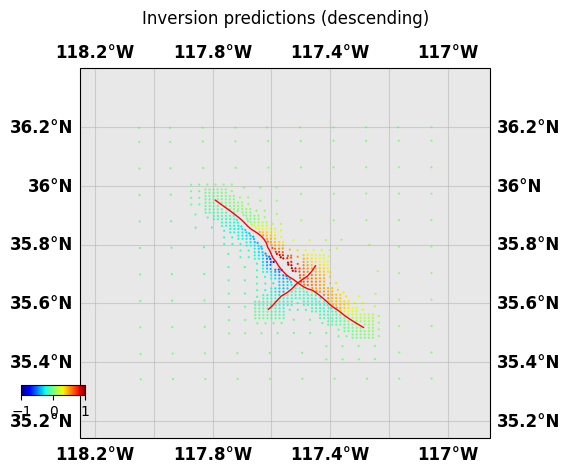

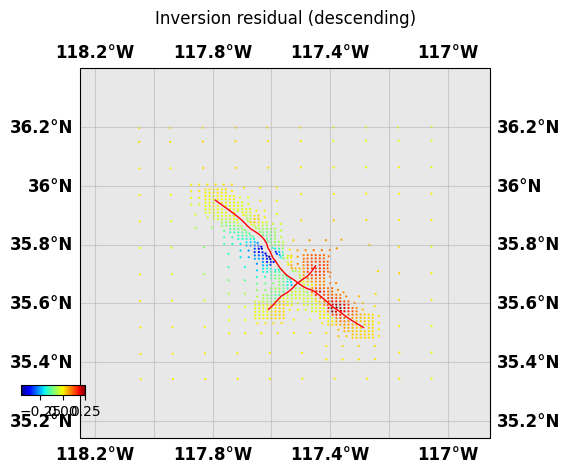

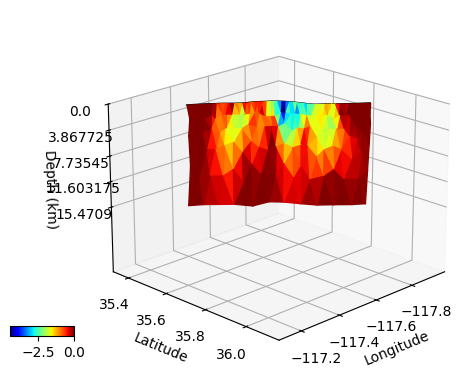

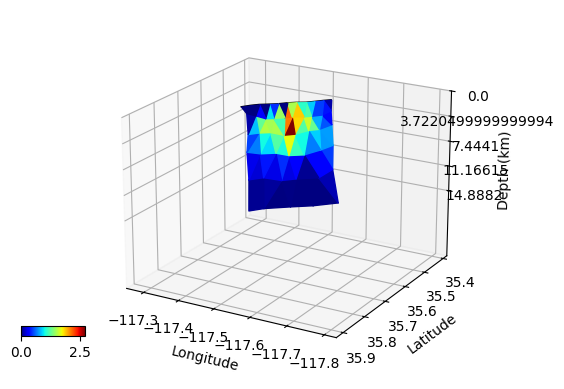

In [7]:
# bounds = []
# bounds += [[-20., 0.]] * faults[0].N_slip
# bounds += [[-5., 5.]] * faults[0].N_slip
# bounds += [[0., 20.]] * faults[1].N_slip
# bounds += [[-5., 5.]] * faults[1].N_slip
# bounds += [[-100., 100.]]*trans.TransformationParameters

multi, faults, datasets, trans = pickle.load(open("../results/in01/outputs/tmp_results_widebounds.pickle", "rb"))

datasets[0].plot(markersize=2.5, data="data", title="Data (ascending)", norm=(-1., 1.), faults=faults)
datasets[0].plot(markersize=2.5, data="synth", title="Inversion predictions (ascending)", norm=(-1., 1.), faults=faults)
datasets[0].plot(markersize=2.5, data="res", title="Inversion residual (ascending)", faults=faults)
datasets[1].plot(markersize=2.5, data="data", title="Data (descending)", norm=(-1., 1.), faults=faults)
datasets[1].plot(markersize=2.5, data="synth", title="Inversion predictions (descending)", norm=(-1., 1.), faults=faults)
datasets[1].plot(markersize=2.5, data="res", title="Inversion residual (descending)", faults=faults)
faults[0].plot(view=(20., 45.), slip="strikeslip", plot_on_2d=False)
faults[1].plot(view=(20., 120.), slip="strikeslip", plot_on_2d=False)

## Check Cd

Cd diagonal values: [0.00049129 0.00049129 0.00049129 ... 0.00036651 0.00036651 0.00036651]


Text(0.5, 1.0, 'Distribution of covariances of Cd matrix')

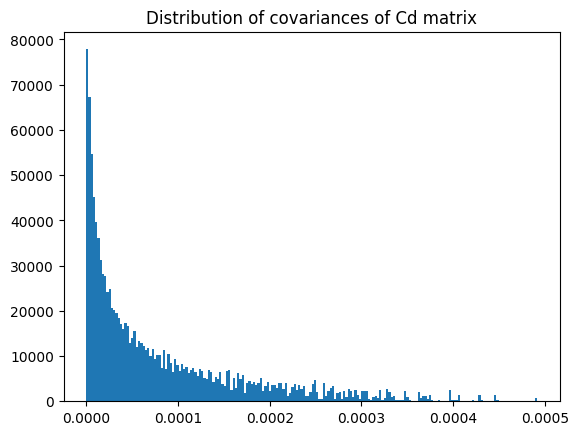

In [8]:
plt.close("all")
multi, faults, datasets, trans = pickle.load(open("../results/in01/outputs/tmp_results.pickle", "rb"))

print("Cd diagonal values:", np.diag(multi.Cd))

cd_flat = multi.Cd.flatten()
cd_flat = cd_flat[np.where(cd_flat > 0.)]

plt.hist(cd_flat, bins=200)
plt.title("Distribution of covariances of Cd matrix")

## Check Cm

Text(0.5, 1.0, 'Distribution of covariances of Cm matrix')

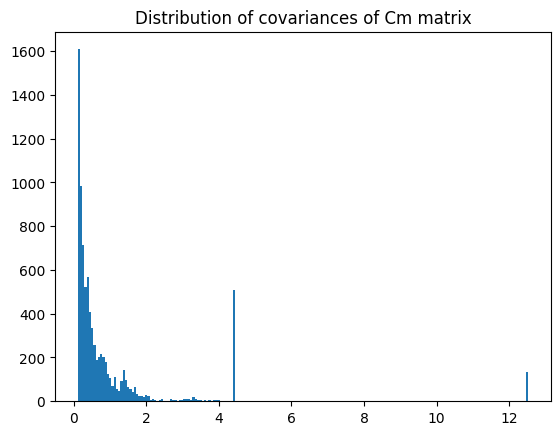

In [9]:
# for fault in faults:
#     fault.buildCm(8., 1.)
# trans.buildCm(1000.)

plt.close("all")
multi, faults, datasets, trans = pickle.load(open("../results/in01/outputs/tmp_results_cm.pickle", "rb"))

slip_Cm = multi.Cm[:-6, :-6]
cm_flat = slip_Cm[np.where(slip_Cm > 0.1)].flatten()

plt.hist(cm_flat, bins=200)
plt.title("Distribution of covariances of Cm matrix")

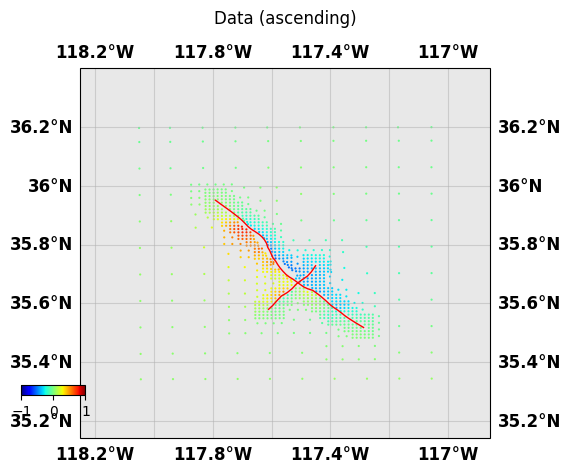

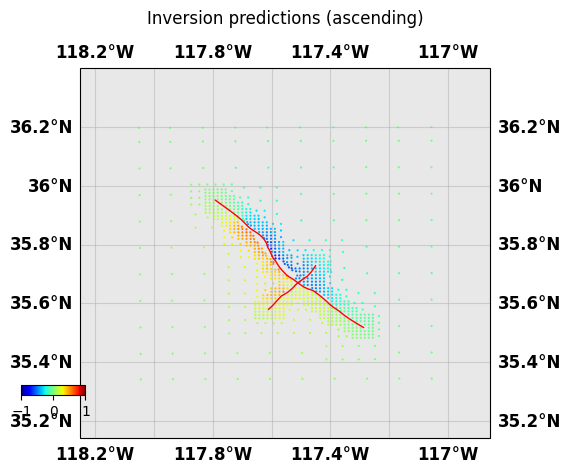

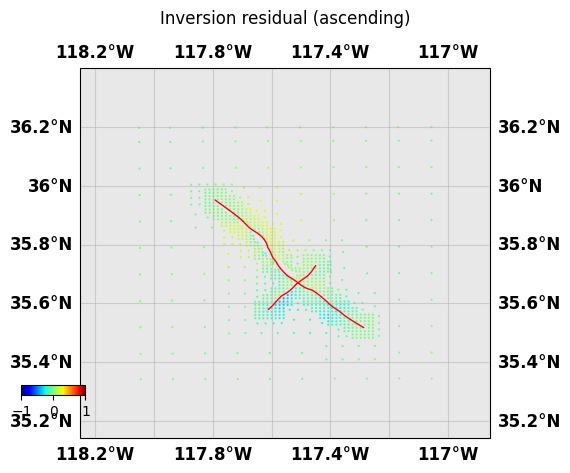

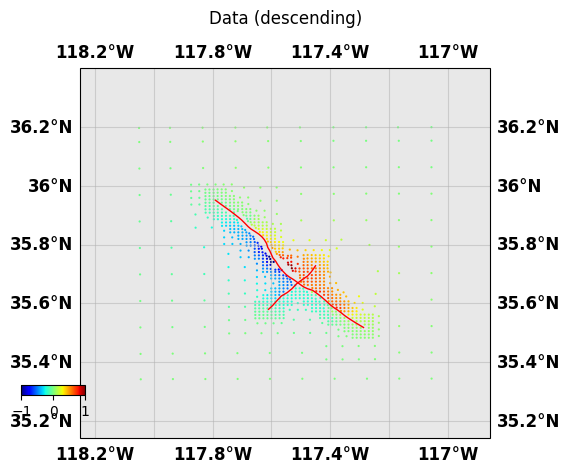

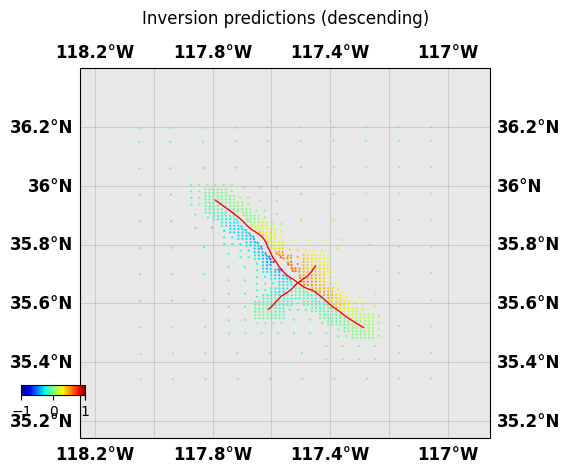

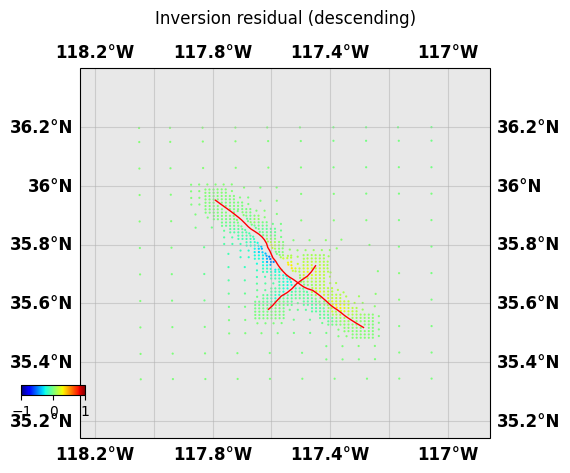

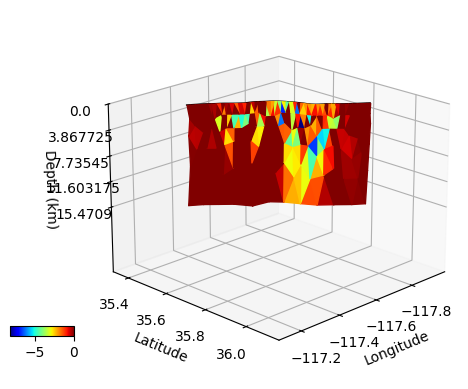

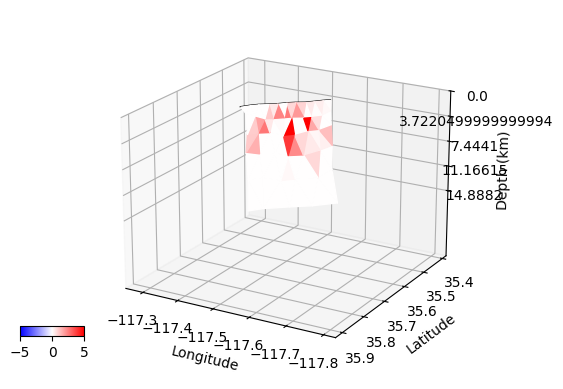

In [10]:
plt.close("all")
multi, faults, datasets, trans = pickle.load(open("../results/in01/outputs/tmp_results_cm.pickle", "rb"))

datasets[0].plot(markersize=2.5, data="data", title="Data (ascending)", norm=(-1., 1.), faults=faults)
datasets[0].plot(markersize=2.5, data="synth", title="Inversion predictions (ascending)", norm=(-1., 1.), faults=faults)
datasets[0].plot(markersize=2.5, data="res", title="Inversion residual (ascending)", norm=(-1., 1.), faults=faults)
datasets[1].plot(markersize=2.5, data="data", title="Data (descending)", norm=(-1., 1.), faults=faults)
datasets[1].plot(markersize=2.5, data="synth", title="Inversion predictions (descending)", norm=(-1., 1.), faults=faults)
datasets[1].plot(markersize=2.5, data="res", title="Inversion residual (descending)", norm=(-1, 1.), faults=faults)
faults[0].plot(view=(20., 45.), slip="strikeslip", plot_on_2d=False)
faults[1].plot(view=(20., 120.), slip="strikeslip", plot_on_2d=False, norm=(-5., 5.), cmap="bwr")

## Check dip slip

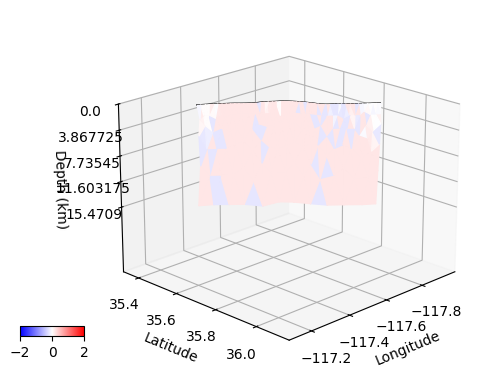

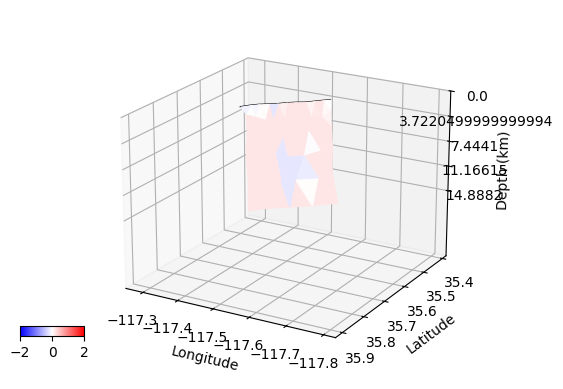

In [11]:
plt.close("all")
multi, faults, datasets, trans = pickle.load(open("../results/in01/outputs/tmp_results_cm.pickle", "rb"))

faults[0].plot(view=(20., 45.), slip="dipslip", plot_on_2d=False, norm=(-2., 2.), cmap="bwr")
faults[1].plot(view=(20., 120.), slip="dipslip", plot_on_2d=False, norm=(-2., 2.), cmap="bwr")

## Check orbital parameters

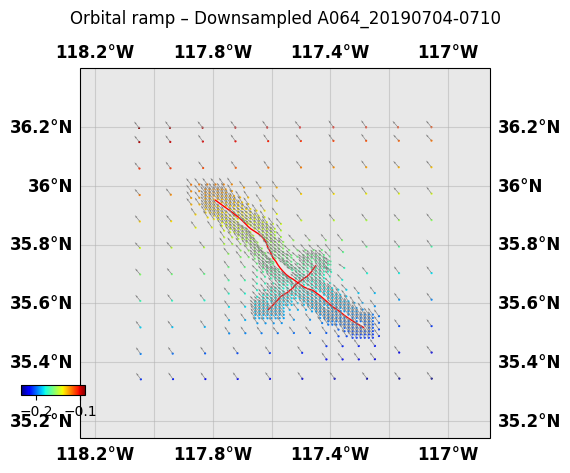

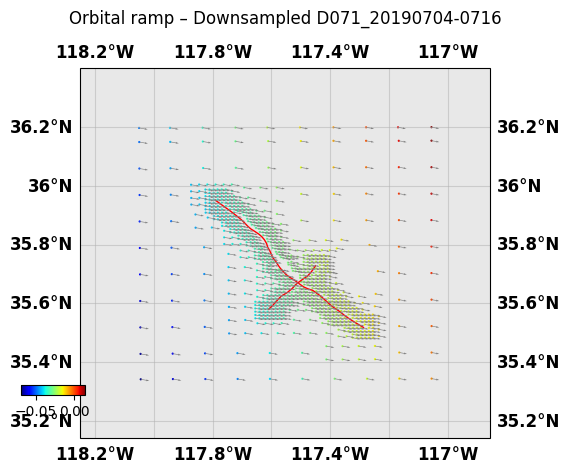

In [12]:
plt.close("all")
multi, faults, datasets, trans = pickle.load(open("../results/in01/outputs/tmp_results_cm.pickle", "rb"))

for d in datasets:
    kwargs = {}
    kwargs["los"] = (d.lon, d.lat, d.los[:,0], d.los[:,1], {"color":'grey', "width":0.0015})
    d.synth = d.orbit
    d.plot(markersize=2.5, data="synth", title=f"Orbital ramp – {d.name}", faults=faults, **kwargs)

## Check Greens functions

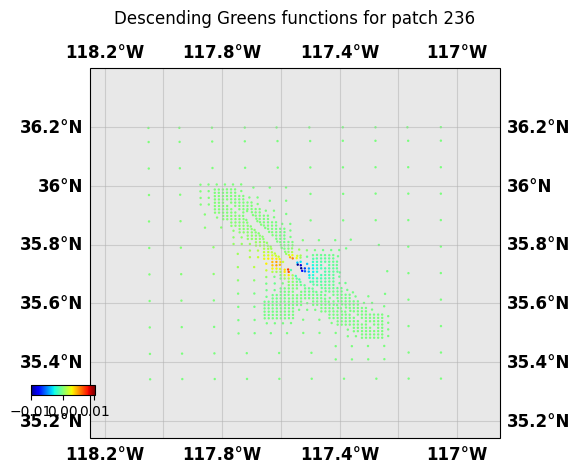

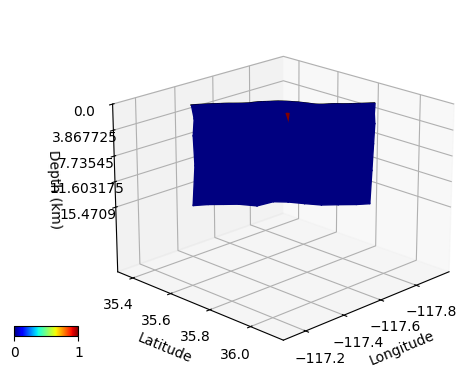

In [ ]:
plt.close("all")
multi, faults, datasets, trans = pickle.load(open("../results/in01/outputs/tmp_results.pickle", "rb"))

idx = np.random.randint(0, 252)
# idx = 47
kwargs = {}
kwargs["los"] = (datasets[1].lon, datasets[1].lat, datasets[1].los[:,0], datasets[1].los[:,1], {"color":'grey', "width":0.0015})

datasets[1].synth = faults[0].G["Downsampled D071_20190704-0716"]["strikeslip"][:,idx]
norm_bnd = np.max(np.abs(datasets[1].synth))
datasets[1].plot(markersize=3., data="synth", title=f"Descending Greens functions for patch {idx}", norm=(-norm_bnd, norm_bnd), **kwargs)

faults[0].initializeslip()
faults[0].slip[idx, 0] = 1.
faults[0].plot(view=(20., 45.), plot_on_2d=False)

## Check sign errors

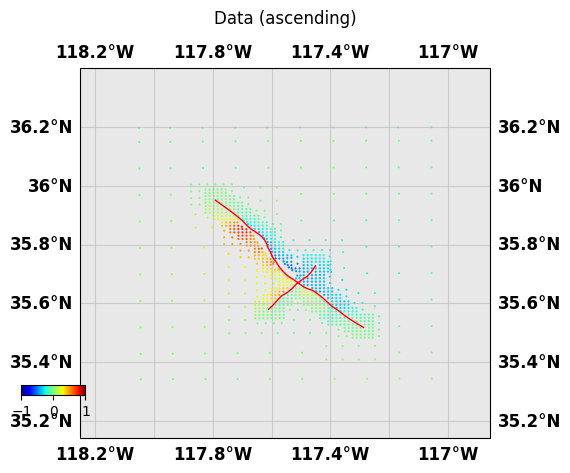

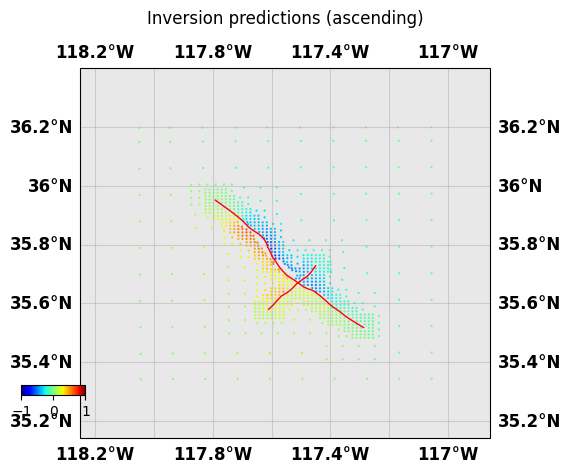

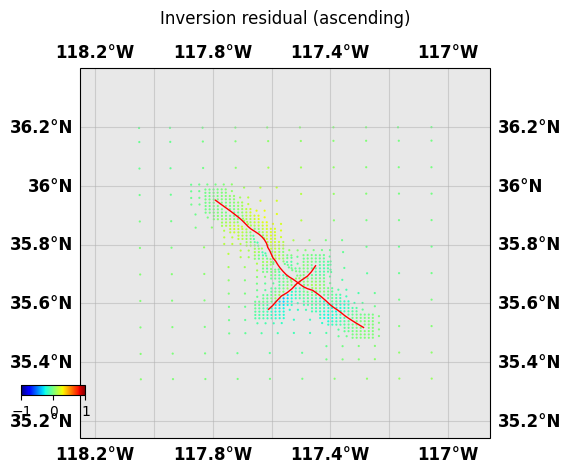

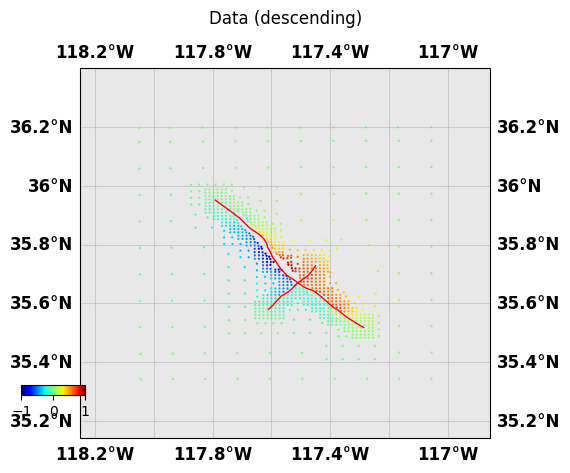

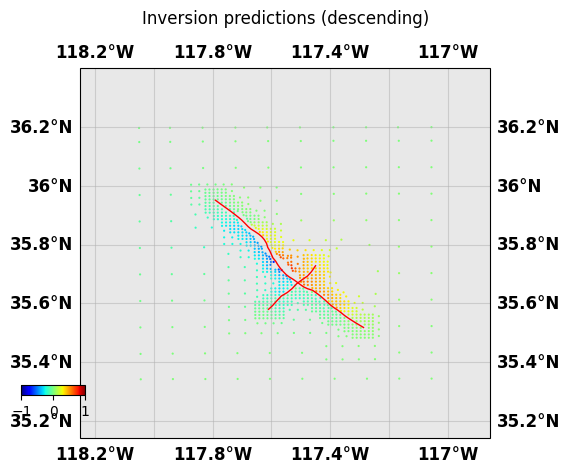

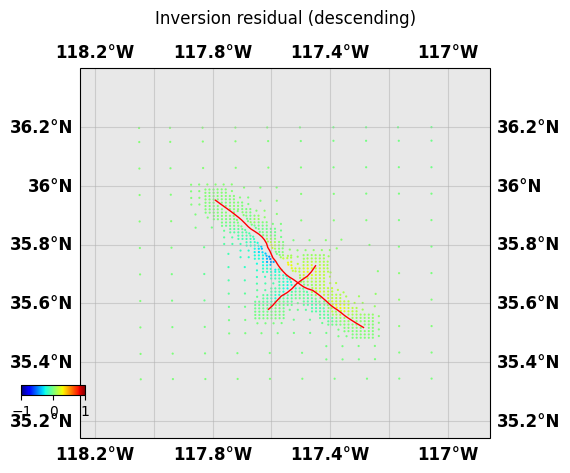

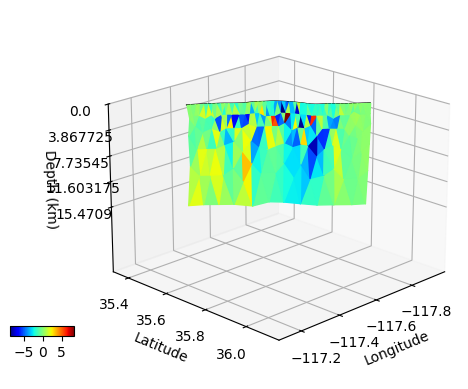

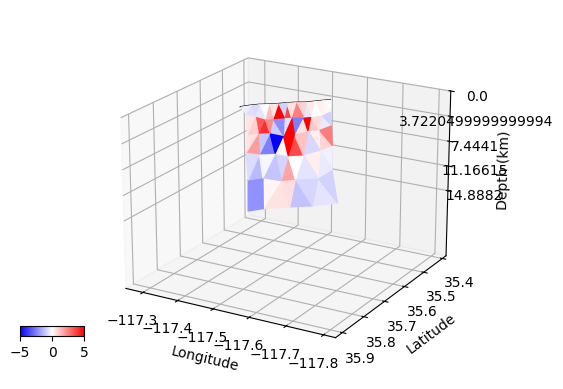

In [14]:
####    ALLOWING NEGATIVE SLIP IN INVERSION    ####
plt.close("all")
multi, faults, datasets, trans = pickle.load(open("../results/in01/outputs/tmp_results_allowneg.pickle", "rb"))

datasets[0].plot(markersize=2.5, data="data", title="Data (ascending)", norm=(-1., 1.), faults=faults)
datasets[0].plot(markersize=2.5, data="synth", title="Inversion predictions (ascending)", norm=(-1., 1.), faults=faults)
datasets[0].plot(markersize=2.5, data="res", title="Inversion residual (ascending)", norm=(-1., 1.), faults=faults)
datasets[1].plot(markersize=2.5, data="data", title="Data (descending)", norm=(-1., 1.), faults=faults)
datasets[1].plot(markersize=2.5, data="synth", title="Inversion predictions (descending)", norm=(-1., 1.), faults=faults)
datasets[1].plot(markersize=2.5, data="res", title="Inversion residual (descending)", norm=(-1, 1.), faults=faults)
faults[0].plot(view=(20., 45.), slip="strikeslip", plot_on_2d=False)
faults[1].plot(view=(20., 120.), slip="strikeslip", plot_on_2d=False, norm=(-5., 5.), cmap="bwr")

In [ ]:
plt.close("all")
multi, faults, datasets, trans = pickle.load(open("../results/in01/outputs/tmp_results.pickle", "rb"))

fault = faults[0]
faults[0].slip = np.zeros_like(faults[0].slip)
faults[1].slip = np.zeros_like(faults[1].slip)
fault.slip[:,0] = 1.

for data in datasets:
    data.buildsynth(faults)
    args = {}
    # args = {"los": [data.lon, data.lat, data.los[:,0], data.los[:,1], {"color":'grey', "width":0.0015}], "gps": gnsss}
    data.plot(title=f"{data.name} – data", data="data", markersize=2., faults=[fault], **args)
    data.plot(title=f"{data.name} – synth", data="synth", markersize=2., faults=[fault], **args)

## Check inversion parameters

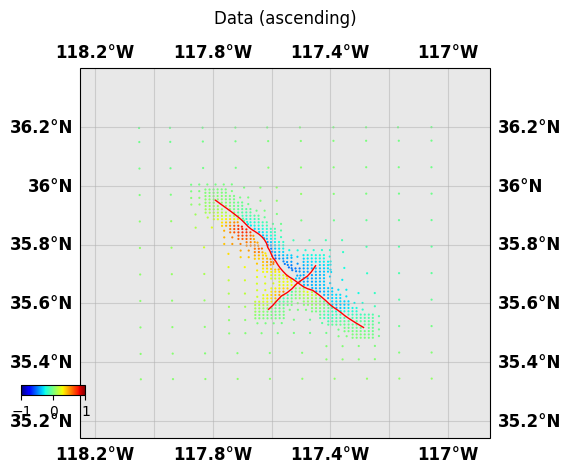

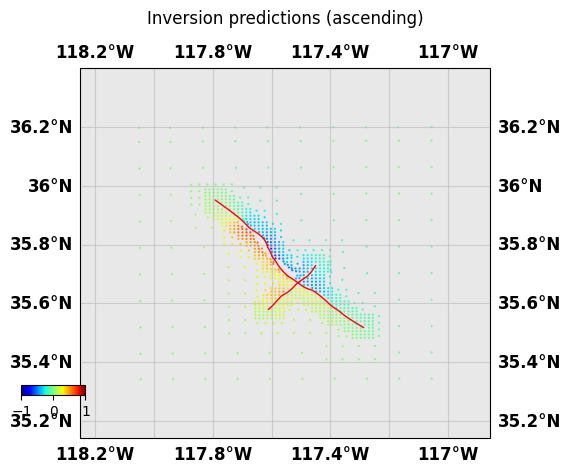

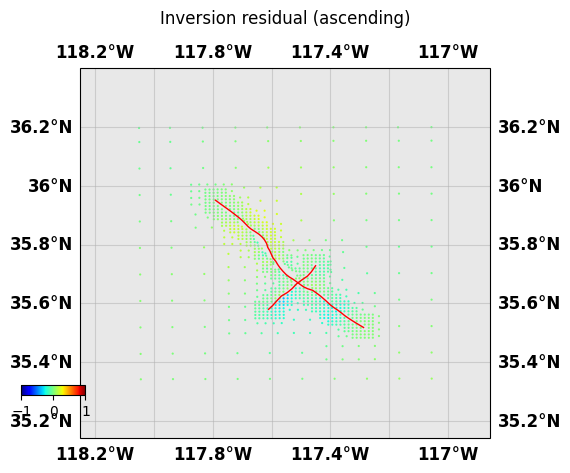

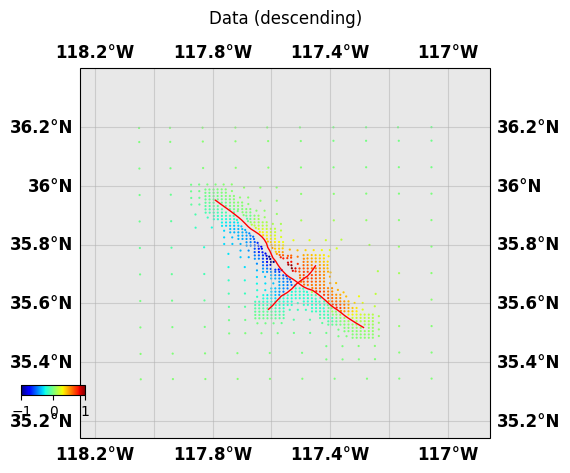

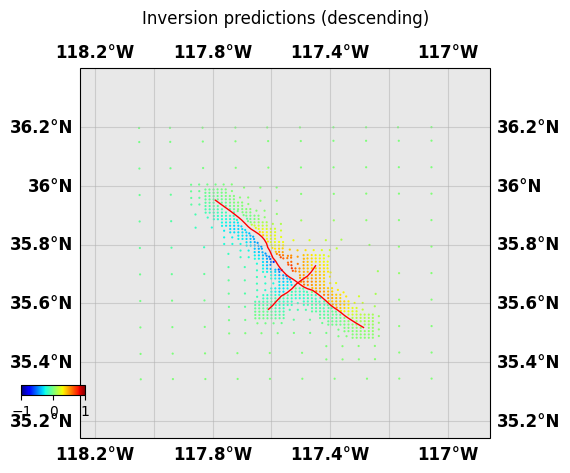

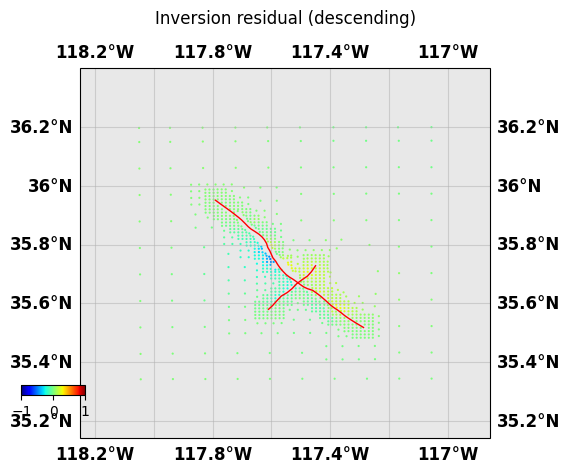

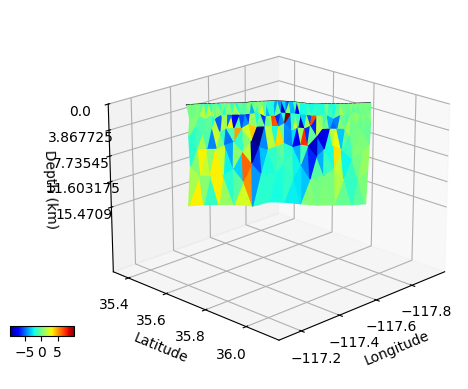

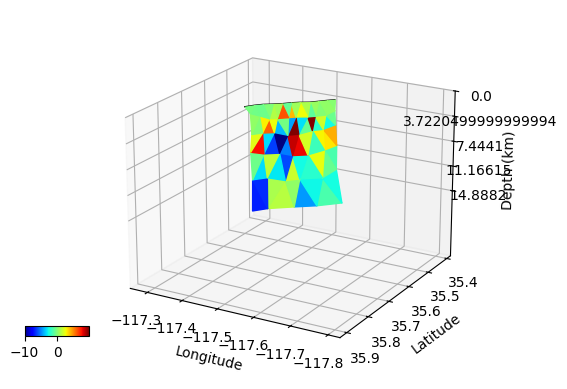

In [15]:
# multi.ConstrainedLeastSquareSoln(bounds=bounds, 
#                               iterations=1000,
#                               method='L-BFGS-B',
#                               mprior=mprior, 
#                               tolerance=1e-8, 
#                               maxfun=1e10, 
#                               checkIter=True)

plt.close("all")
multi, faults, datasets, trans = pickle.load(open("../results/in01/outputs/tmp_results_invparams.pickle", "rb"))

datasets[0].plot(markersize=2.5, data="data", title="Data (ascending)", norm=(-1., 1.), faults=faults)
datasets[0].plot(markersize=2.5, data="synth", title="Inversion predictions (ascending)", norm=(-1., 1.), faults=faults)
datasets[0].plot(markersize=2.5, data="res", title="Inversion residual (ascending)", norm=(-1., 1.), faults=faults)
datasets[1].plot(markersize=2.5, data="data", title="Data (descending)", norm=(-1., 1.), faults=faults)
datasets[1].plot(markersize=2.5, data="synth", title="Inversion predictions (descending)", norm=(-1., 1.), faults=faults)
datasets[1].plot(markersize=2.5, data="res", title="Inversion residual (descending)", norm=(-1, 1.), faults=faults)
faults[0].plot(view=(20., 45.), slip="strikeslip", plot_on_2d=False)
faults[1].plot(view=(20., 120.), slip="strikeslip", plot_on_2d=False)

## Add GNSS

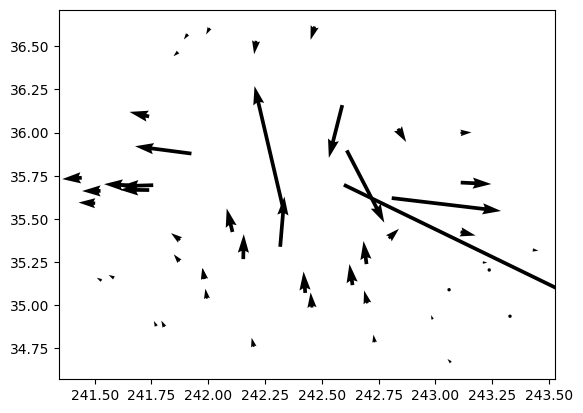

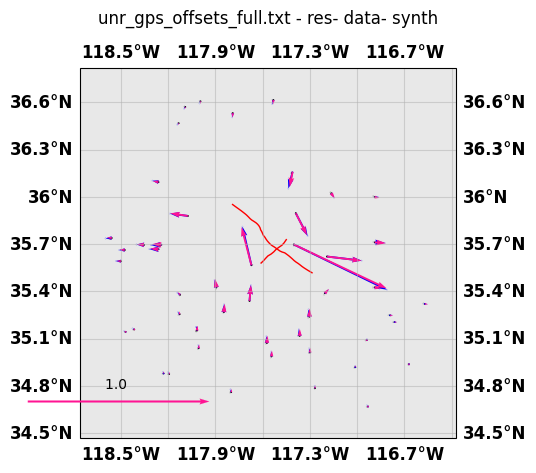

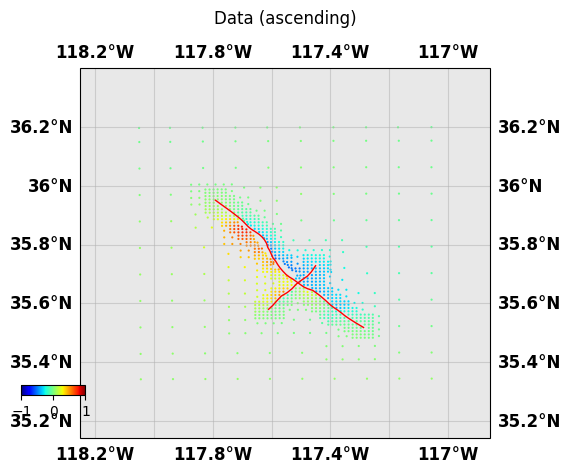

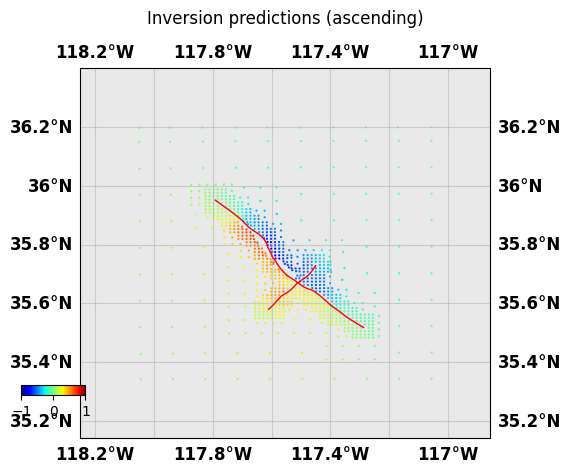

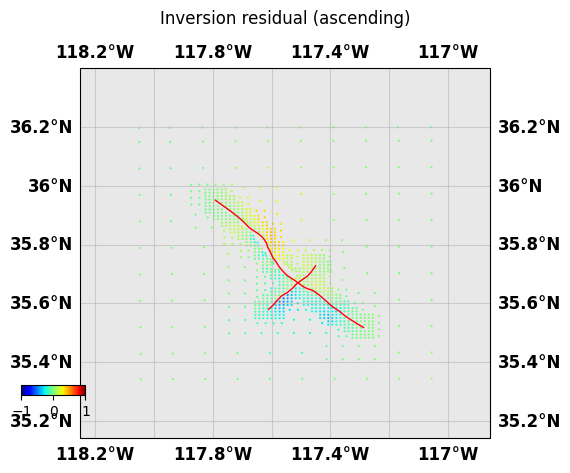

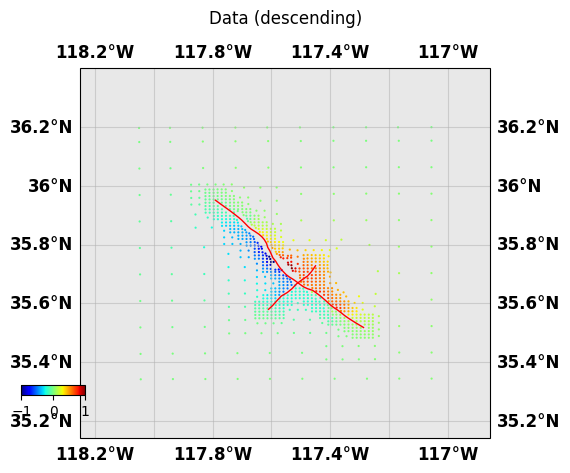

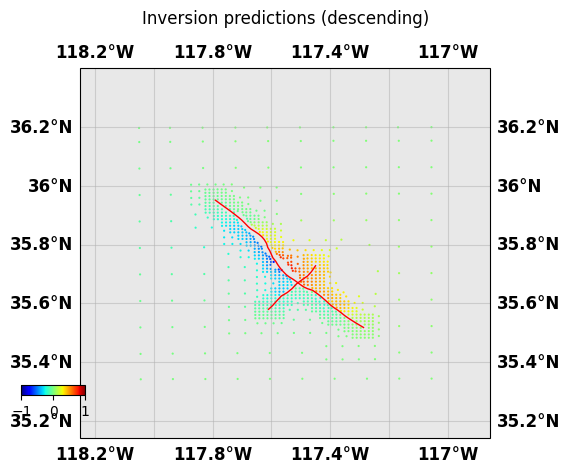

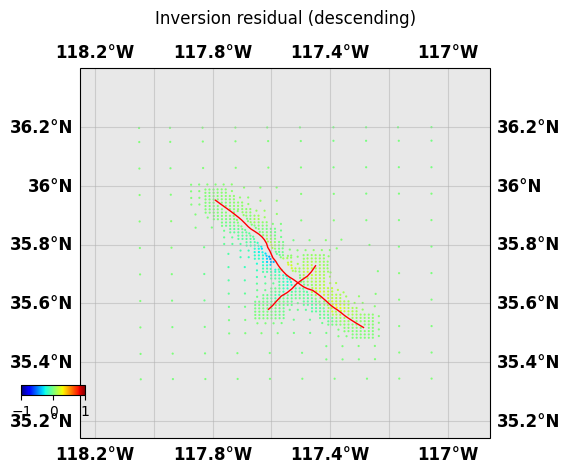

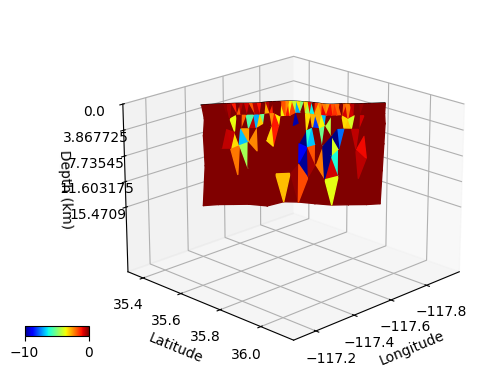

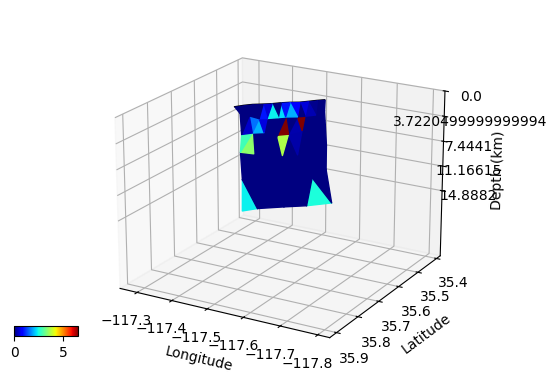

In [20]:
# %matplotlib ipympl
plt.close("all")
multi, faults, datasets, trans = pickle.load(open("../results/in01/outputs/tmp_results_gnss.pickle", "rb"))

datasets[2].plot(faults=faults, data=["res", "data", "synth"], color=["k", "b", "deeppink"], legendscale=1.)
datasets[0].plot(markersize=2.5, data="data", title="Data (ascending)", norm=(-1., 1.), faults=faults)
datasets[0].plot(markersize=2.5, data="synth", title="Inversion predictions (ascending)", norm=(-1., 1.), faults=faults)
datasets[0].plot(markersize=2.5, data="res", title="Inversion residual (ascending)", norm=(-1., 1.), faults=faults)
datasets[1].plot(markersize=2.5, data="data", title="Data (descending)", norm=(-1., 1.), faults=faults)
datasets[1].plot(markersize=2.5, data="synth", title="Inversion predictions (descending)", norm=(-1., 1.), faults=faults)
datasets[1].plot(markersize=2.5, data="res", title="Inversion residual (descending)", norm=(-1, 1.), faults=faults)
faults[0].plot(view=(20., 45.), slip="strikeslip", plot_on_2d=False)
faults[1].plot(view=(20., 120.), slip="strikeslip", plot_on_2d=False)

## Add optical

In [ ]:
import csi.opticorr as opticorr
import csi.imagedownsampling as imdown
import csi.imagecovariance as imcov
import os

multi, faults, datasets, trans = pickle.load(open("../results/in01/outputs/tmp_results_gnss.pickle", "rb"))

main_dir = "/Users/hintont/Dev/projects/Ridgecrest"
optical_dir = os.path.join(main_dir, "data/optical")
opti_filepath = os.path.join(optical_dir, "Ridgecrest_1m_utm_detrended")

utm_zone = "11"
lon0 = 360 - 117.5
lat0 = 35.7

opti = opticorr("optical", utmzone=utm_zone, lon0=lon0, lat0=lat0)
opti.read_from_grd(opti_filepath)

---------------------------------
---------------------------------
Initialize Opticorr data set optical
Read from file /Users/hintont/Dev/projects/Ridgecrest/data/optical/Ridgecrest_detrended into data set optical


OSError: [Errno -51] NetCDF: Unknown file format: '/Users/hintont/Dev/projects/Ridgecrest/data/optical/Ridgecrest_detrended_east.grd'

In [ ]:
####    COMPUTE COVARIANCE    ####
covar = imcov("optical cov", opti, verbose=True)

covar.computeCovariance(function='exp', frac=0.01, every=0.5, distmax=35.,tol=1e-10)
covar.plot(data='all', plotData=True)

sigma, lamda = covar.datasets["optical cov"]["Sigma"], covar.datasets["optical cov"]["Lambda"]
print("SAR covariance", (sigma, lamda))

In [ ]:
startWindowSize, minimumWindowSize, chardist, expodist, tol, reject_distance = 5., .5, 1., 0.7, 0.005, 0.05

downsampler = imdown("downsampled optical", opti, faults)
downsampler.initialstate(startWindowSize, minimumWindowSize, tolerance=tol, plot=False)
downsampler.distanceBased(chardist=chardist, expodist=expodist, plot=True)
downsampler.reject_pixels_fault(reject_distance, faults)

print(f"Original number of pixels: {len(opti.x)}")
print(f"Downsampled number of pixels: {len(downsampler.newimage.x)}")

opti = downsampler.newimage

print("Building Cd with variable sigma and lambda:", (sigma, lamda))
opti.buildCd(sigma, lamda, function='exp')